<a href="https://colab.research.google.com/github/EleniAthanasiadou1994/GIS/blob/master/trial%20954.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3D in GIS: The case of LiDAR**


**Practical exercise**

What we are doing

What 


To make a map we need to get some data

Let's get started...


In [7]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 11.8MB 187kB/s 
     |████████████████████████████████| 10.1MB 39.4MB/s 


In [0]:
from shapely.geometry import mapping
from shapely.geometry import Point
from rasterio.mask import mask
import geopandas as gpd
import zipfile
import io
import requests
import elevation
import richdem as rd
import gdal
import os

In [0]:
dem_path = os.path.join(os.getcwd(),'dsm.tiff')
elevation.clip(bounds=(-1.47066,53.49856,-1.39839,53.53591), output=dem_path)

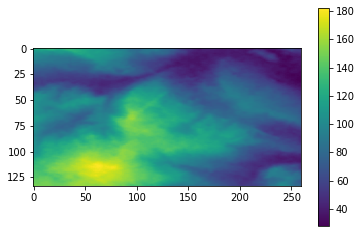

In [20]:
import matplotlib   
import matplotlib.pyplot as plt
dsm = rd.LoadGDAL(dem_path)
plt.imshow(dsm, interpolation='none')
plt.colorbar()
plt.show()

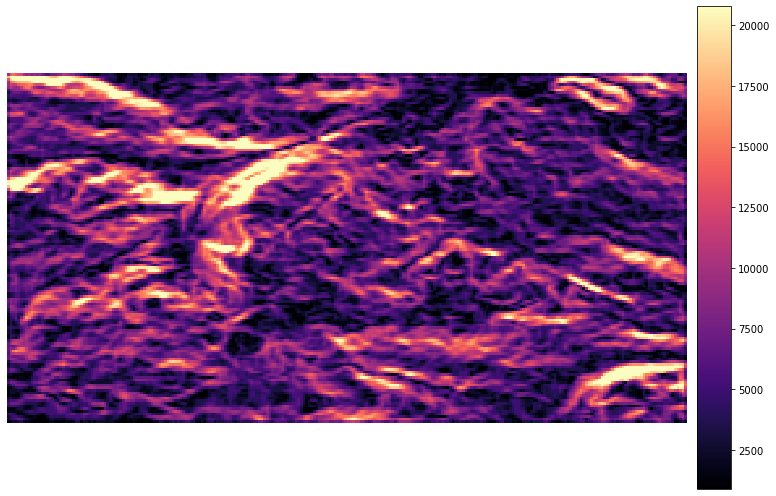

In [65]:
slope = rd.TerrainAttribute(dsm, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(11.25, 7))
plt.show()

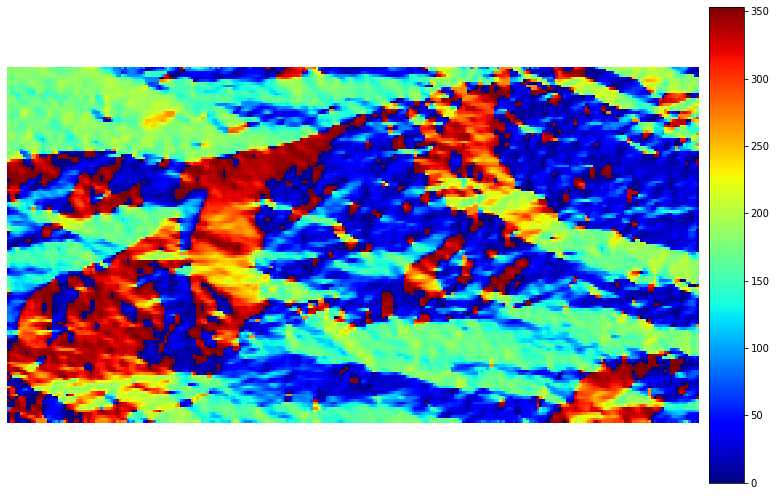

In [66]:
aspect = rd.TerrainAttribute(dsm, attrib='aspect')
rd.rdShow(aspect, axes=False, cmap='jet', figsize=(11.25, 7))
plt.show()

In [0]:
gdal_data = gdal.Open(dem_path)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# let's convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
# you knopw this by now ... we are talking about NaN values (the very annoying ones)
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

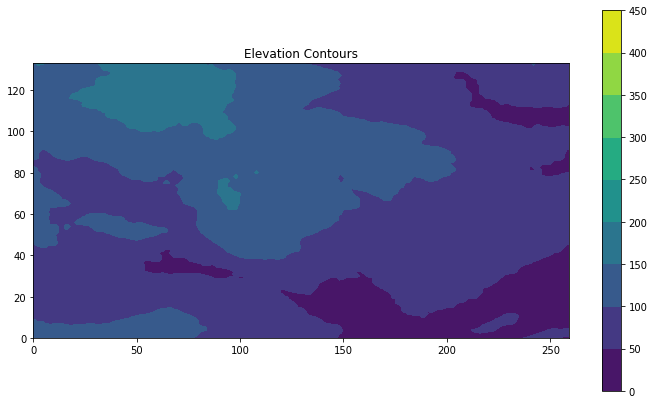

In [82]:
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 500, 50)))
plt.title("Elevation Contours")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

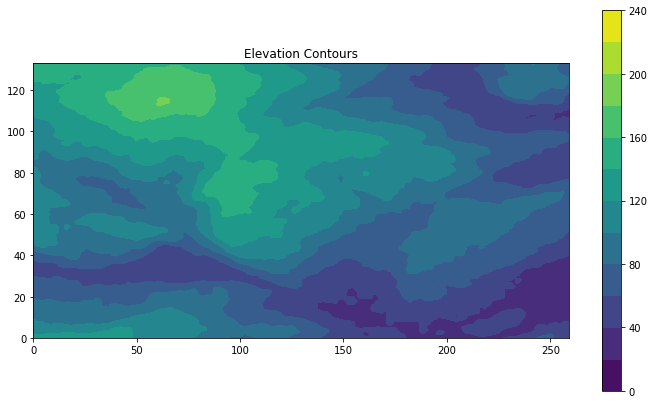

In [87]:
fig = plt.figure(figsize = (12, 7))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 250, 20)))
plt.title("Elevation Contours")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()